## The Impact of BMI on Family Health

*The data set I use is a case study that recorded the BMI of a family before and after the treatment in America. It recorded the BMI of children aged 3 to 22 years old and their parent situations.*


In [24]:
install.packages("performance")
install.packages("visdat")

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



_In this analysis, I will use tidyverse to make some adjustments and manipulate the data. But first I'm going to use readxl to read the data and then visdat to take a look at the data._

In [26]:
#Load the package that need to use for tidy up the data set.
library(tidyverse)
library(performance)
library(visdat)
library(readxl)

In [2]:
#Read the xlsx file using package readxl
bmi <- read_excel("bmi_groupwork.xlsx")

## Cleaning data

_Check all the name of variables using `head` function, and see if there are some variables are not useful._

In [3]:
bmi %>% head()

sex,Age_at_inclusion,first_zBMI,last_zBMI,difdates,delta_zBMI,Dismissed_at_parent_followup,social_class,lives_with,father_height_m,⋯,mom_end_weight,mom_end_BMI,Mom_delta_bmi,dad_end_height,Dad_end_weight,dad_end_BMI,Dad_delta_BMI,mom_included,dad_included,Visits_total
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,5.5,2.773937,3.193260,2221,0.41932287,2,3,1,1.70,⋯,92,34.20583,-2.230815,1.72,103,34.81612,3.6742483,1,1,36
1,15.9,4.144636,3.984416,721,-0.16021940,1,2,1,1.94,⋯,112,40.64451,5.323268,1.96,115,29.93544,-3.5431408,1,1,28
1,7.7,3.005218,2.913759,2118,-0.09145966,2,2,1,1.94,⋯,86,33.59375,-1.562500,1.94,104,27.63312,0.5314061,1,1,52
1,11.4,3.870431,4.152617,1832,0.28218598,NA,NA,2,1.75,⋯,NA,NA,NA,NA,NA,NA,NA,2,2,52
2,7.7,3.705686,3.336375,1293,-0.36931110,1,4,NA,1.86,⋯,101,33.74653,9.525080,1.86,136,39.31090,0.0000000,1,1,14
1,11.7,3.408511,3.412709,272,0.00419885,1,3,1,1.80,⋯,61,24.43519,1.201730,1.76,96,30.99174,3.2139578,1,1,7


_For the *next* step, we will remove all the variables that are not necessary from our observation using the `select` function._

In [33]:
my_bmi_withna <- bmi %>%
  select(-c(
    "Visits_total",
    "Dismissed_at_parent_followup",
    "mom_included",
    "dad_included",
    "lives_with",
    "mom_ow",
    "dad_ow",
    "difdates",
    "parent_treatment_time",
    "mom_end_height",
    "dad_end_height",
    "Age_at_inclusion"
    ))
my_bmi_withna

sex,first_zBMI,last_zBMI,delta_zBMI,social_class,father_height_m,father_weight,dad_start_BMI,mother_height_m,mother_weight,mom_start_BMI,mom_end_weight,mom_end_BMI,Mom_delta_bmi,Dad_end_weight,dad_end_BMI,Dad_delta_BMI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2.773937,3.1932595,0.419322868,3,1.70,90,31.14187,1.64,98,36.43664,92,34.20583,-2.2308150,103,34.81612,3.6742483
1,4.144636,3.9844163,-0.160219399,2,1.94,126,33.47858,1.64,95,35.32124,112,40.64451,5.3232684,115,29.93544,-3.5431408
1,3.005218,2.9137588,-0.091459657,2,1.94,102,27.10171,1.60,90,35.15625,86,33.59375,-1.5625000,104,27.63312,0.5314061
1,3.870431,4.1526172,0.282185980,NA,1.75,115,37.55102,1.62,81,30.86420,NA,NA,NA,NA,NA,NA
2,3.705686,3.3363749,-0.369311102,4,1.86,136,39.31090,1.70,70,24.22145,101,33.74653,9.5250802,136,39.31090,0.0000000
1,3.408511,3.4127094,0.004198850,3,1.80,90,27.77778,1.58,58,23.23346,61,24.43519,1.2017305,96,30.99174,3.2139578
1,4.403737,4.3339183,-0.069819106,4,1.75,115,37.55102,1.72,120,40.56247,NA,NA,NA,NA,NA,NA
1,2.804181,2.8091723,0.004991648,NA,1.80,120,37.03704,1.64,80,29.74420,NA,NA,NA,NA,NA,NA
2,2.738846,2.5290325,-0.209813676,NA,1.90,95,26.31579,1.77,78,24.89706,82,26.47211,1.5750472,95,26.59500,0.2792107


_Use the `vis_miss` function from inside vis_dat to visualise all the indeed data. With this graph I can understand that about eighteen per cent of my data is missing. So in order to make the analysis smoother, I decided to remove those rows which contained missing data._

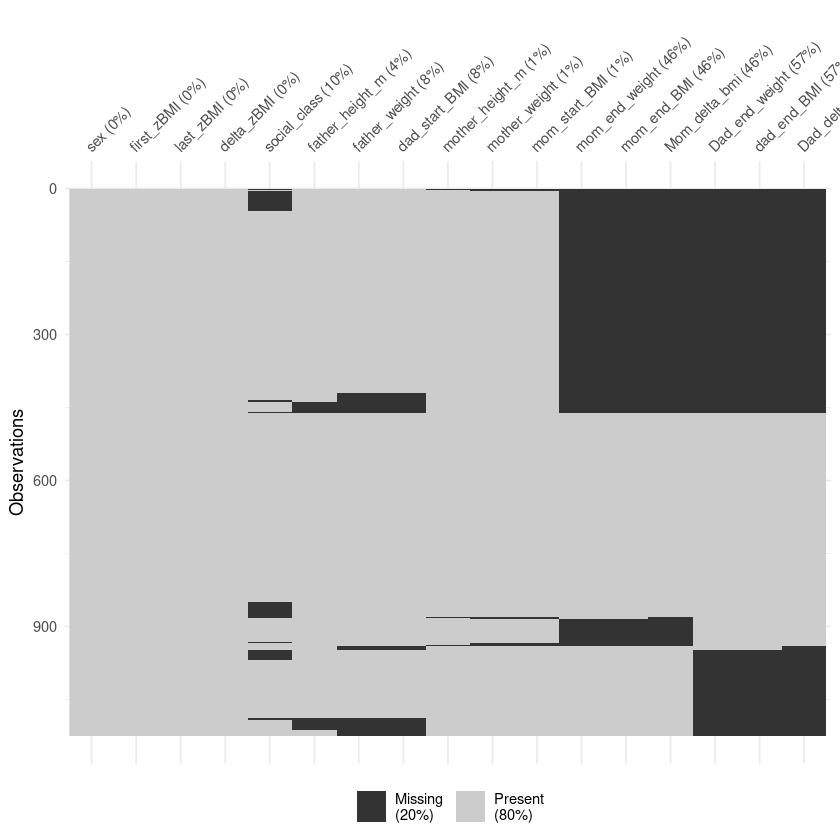

In [34]:
#Check if there are missing values in each variables
my_bmi_withna %>% vis_miss(cluster = TRUE)

_These data were lost because for some reason the creator didn't collect their information, perhaps because those data were too high or too low resulting in large discrepancies across the board._

In [6]:
#remove all the rows that containing the missing value and create a new data frame that only contain clean data
my_bmi <- na.omit(my_bmi_withna)
my_bmi

sex,first_zBMI,last_zBMI,delta_zBMI,social_class,father_height_m,father_weight,dad_start_BMI,mother_height_m,mother_weight,mom_start_BMI,mom_end_weight,mom_end_BMI,Mom_delta_bmi,Dad_end_weight,dad_end_BMI,Dad_delta_BMI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2.773937,3.1932595,0.41932287,3,1.70,90,31.14187,1.64,98.0,36.43664,92,34.20583,-2.23081499,103,34.81612,3.6742483
1,4.144636,3.9844163,-0.16021940,2,1.94,126,33.47858,1.64,95.0,35.32124,112,40.64451,5.32326837,115,29.93544,-3.5431408
1,3.005218,2.9137588,-0.09145966,2,1.94,102,27.10171,1.60,90.0,35.15625,86,33.59375,-1.56250000,104,27.63312,0.5314061
2,3.705686,3.3363749,-0.36931110,4,1.86,136,39.31090,1.70,70.0,24.22145,101,33.74653,9.52508017,136,39.31090,0.0000000
1,3.408511,3.4127094,0.00419885,3,1.80,90,27.77778,1.58,58.0,23.23346,61,24.43519,1.20173049,96,30.99174,3.2139578
2,4.376256,3.0698554,-1.30640049,3,1.78,120,37.87401,1.75,76.0,24.81633,82,26.77551,1.95918367,126,39.76771,1.8937003
2,3.233168,3.1889581,-0.04420984,3,1.70,105,36.33218,1.67,53.0,19.00391,70,25.09950,6.09559324,113,39.10035,2.7681661
2,2.589818,0.9102655,-1.67955293,2,1.85,85,24.83565,1.78,65.0,20.51509,67,21.14632,0.63123343,85,24.83565,0.0000000
1,2.846505,2.8879940,0.04148857,3,1.76,102,32.92872,1.65,84.0,30.85399,94,33.30499,2.45099417,95,30.66890,-2.2598141


_Review on the data and see everything is usual, at this point I find out I found out that the BMI numbers for kids were wrong because BMI's are supposed to be between 10 and 40. The reason why they put a decimal point is because it's easier for them to calculate and keep track of other relationships._

_By looking at the modified data set, I noticed that they used numbers to represent male female. In subsequent analyses I believe I am going to use gender to differentiate their BMI thus finding the difference in BMI by gender.So I'm going to need a string variable for gender. I will use the `mutate` function to create a new variable to replace the existing one._

In [7]:
#As the gender is been recorded by number I need to put them into male and female then I can factor them.
my_bmi <- my_bmi %>%
  mutate(gender = recode(sex, '1' = "male", '2' = "female"))
#Now I can group the data by gender, instead of sex. Therefore, sex become a meaningless variable.
my_bmi <- my_bmi %>%
  select(-"sex")
my_bmi

first_zBMI,last_zBMI,delta_zBMI,social_class,father_height_m,father_weight,dad_start_BMI,mother_height_m,mother_weight,mom_start_BMI,mom_end_weight,mom_end_BMI,Mom_delta_bmi,Dad_end_weight,dad_end_BMI,Dad_delta_BMI,gender
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2.773937,3.1932595,0.41932287,3,1.70,90,31.14187,1.64,98.0,36.43664,92,34.20583,-2.23081499,103,34.81612,3.6742483,female
4.144636,3.9844163,-0.16021940,2,1.94,126,33.47858,1.64,95.0,35.32124,112,40.64451,5.32326837,115,29.93544,-3.5431408,male
3.005218,2.9137588,-0.09145966,2,1.94,102,27.10171,1.60,90.0,35.15625,86,33.59375,-1.56250000,104,27.63312,0.5314061,male
3.705686,3.3363749,-0.36931110,4,1.86,136,39.31090,1.70,70.0,24.22145,101,33.74653,9.52508017,136,39.31090,0.0000000,female
3.408511,3.4127094,0.00419885,3,1.80,90,27.77778,1.58,58.0,23.23346,61,24.43519,1.20173049,96,30.99174,3.2139578,male
4.376256,3.0698554,-1.30640049,3,1.78,120,37.87401,1.75,76.0,24.81633,82,26.77551,1.95918367,126,39.76771,1.8937003,female
3.233168,3.1889581,-0.04420984,3,1.70,105,36.33218,1.67,53.0,19.00391,70,25.09950,6.09559324,113,39.10035,2.7681661,female
2.589818,0.9102655,-1.67955293,2,1.85,85,24.83565,1.78,65.0,20.51509,67,21.14632,0.63123343,85,24.83565,0.0000000,female
2.846505,2.8879940,0.04148857,3,1.76,102,32.92872,1.65,84.0,30.85399,94,33.30499,2.45099417,95,30.66890,-2.2598141,male


In [8]:
#Correct the BMI by multipled them by 10.
my_bmi <- my_bmi %>%
  mutate(first_zBMI = first_zBMI * 10)

my_bmi <- my_bmi %>%
  mutate(last_zBMI = last_zBMI * 10)

my_bmi <- my_bmi %>%
  mutate(delta_zBMI = delta_zBMI * 10)
my_bmi

first_zBMI,last_zBMI,delta_zBMI,social_class,father_height_m,father_weight,dad_start_BMI,mother_height_m,mother_weight,mom_start_BMI,mom_end_weight,mom_end_BMI,Mom_delta_bmi,Dad_end_weight,dad_end_BMI,Dad_delta_BMI,gender
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
27.73937,31.932595,4.1932287,3,1.70,90,31.14187,1.64,98.0,36.43664,92,34.20583,-2.23081499,103,34.81612,3.6742483,female
41.44636,39.844163,-1.6021940,2,1.94,126,33.47858,1.64,95.0,35.32124,112,40.64451,5.32326837,115,29.93544,-3.5431408,male
30.05218,29.137588,-0.9145966,2,1.94,102,27.10171,1.60,90.0,35.15625,86,33.59375,-1.56250000,104,27.63312,0.5314061,male
37.05686,33.363749,-3.6931110,4,1.86,136,39.31090,1.70,70.0,24.22145,101,33.74653,9.52508017,136,39.31090,0.0000000,female
34.08511,34.127094,0.0419885,3,1.80,90,27.77778,1.58,58.0,23.23346,61,24.43519,1.20173049,96,30.99174,3.2139578,male
43.76256,30.698554,-13.0640049,3,1.78,120,37.87401,1.75,76.0,24.81633,82,26.77551,1.95918367,126,39.76771,1.8937003,female
32.33168,31.889581,-0.4420984,3,1.70,105,36.33218,1.67,53.0,19.00391,70,25.09950,6.09559324,113,39.10035,2.7681661,female
25.89818,9.102655,-16.7955293,2,1.85,85,24.83565,1.78,65.0,20.51509,67,21.14632,0.63123343,85,24.83565,0.0000000,female
28.46505,28.879940,0.4148857,3,1.76,102,32.92872,1.65,84.0,30.85399,94,33.30499,2.45099417,95,30.66890,-2.2598141,male


In [9]:
#Rename all the vairables to appropriate names.
my_bmi <- my_bmi %>%
  rename(
  child_start_BMI = first_zBMI,
  child_end_BMI = last_zBMI,
  child_BMI_decreased = delta_zBMI,
  dad_BMI_decreased = Dad_delta_BMI,
  mom_BMI_decreased = Mom_delta_bmi
)
my_bmi

child_start_BMI,child_end_BMI,child_BMI_decreased,social_class,father_height_m,father_weight,dad_start_BMI,mother_height_m,mother_weight,mom_start_BMI,mom_end_weight,mom_end_BMI,mom_BMI_decreased,Dad_end_weight,dad_end_BMI,dad_BMI_decreased,gender
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
27.73937,31.932595,4.1932287,3,1.70,90,31.14187,1.64,98.0,36.43664,92,34.20583,-2.23081499,103,34.81612,3.6742483,female
41.44636,39.844163,-1.6021940,2,1.94,126,33.47858,1.64,95.0,35.32124,112,40.64451,5.32326837,115,29.93544,-3.5431408,male
30.05218,29.137588,-0.9145966,2,1.94,102,27.10171,1.60,90.0,35.15625,86,33.59375,-1.56250000,104,27.63312,0.5314061,male
37.05686,33.363749,-3.6931110,4,1.86,136,39.31090,1.70,70.0,24.22145,101,33.74653,9.52508017,136,39.31090,0.0000000,female
34.08511,34.127094,0.0419885,3,1.80,90,27.77778,1.58,58.0,23.23346,61,24.43519,1.20173049,96,30.99174,3.2139578,male
43.76256,30.698554,-13.0640049,3,1.78,120,37.87401,1.75,76.0,24.81633,82,26.77551,1.95918367,126,39.76771,1.8937003,female
32.33168,31.889581,-0.4420984,3,1.70,105,36.33218,1.67,53.0,19.00391,70,25.09950,6.09559324,113,39.10035,2.7681661,female
25.89818,9.102655,-16.7955293,2,1.85,85,24.83565,1.78,65.0,20.51509,67,21.14632,0.63123343,85,24.83565,0.0000000,female
28.46505,28.879940,0.4148857,3,1.76,102,32.92872,1.65,84.0,30.85399,94,33.30499,2.45099417,95,30.66890,-2.2598141,male


In [10]:
#create a CSV file to store the cleaned data.
write.csv(my_bmi, file = "clean_my_bmi.csv", row.names = FALSE)

_After meticulous cleaning and processing of the dataset, I now have a comprehensive and complete set of data ready for further analysis_

## Analysis and Implications

_Use the correlation function to create a correlate matrix to find the correlations between all pairs of variables. Since the data set contains some string variables that I created, and the `cor` function can only work with numeric variables. So I had to use the `sapply` function to create a subset to group all the numeric variables and then use the `cor` function with it._

In [15]:
numeric_var <- sapply(my_bmi, is.numeric)
numeric_var

child_start_BMI       child_end_BMI child_BMI_decreased        social_class 
               TRUE                TRUE                TRUE                TRUE 
    father_height_m       father_weight       dad_start_BMI     mother_height_m 
               TRUE                TRUE                TRUE                TRUE 
      mother_weight       mom_start_BMI      mom_end_weight         mom_end_BMI 
               TRUE                TRUE                TRUE                TRUE 
  mom_BMI_decreased      Dad_end_weight         dad_end_BMI   dad_BMI_decreased 
               TRUE                TRUE                TRUE                TRUE 
             gender 
              FALSE

In [17]:
my_bmi_numeric <- my_bmi[, numeric_var]
cor_matrix <- cor(my_bmi_numeric)
cor_matrix

,child_start_BMI,child_end_BMI,child_BMI_decreased,social_class,father_height_m,father_weight,dad_start_BMI,mother_height_m,mother_weight,mom_start_BMI,mom_end_weight,mom_end_BMI,mom_BMI_decreased,Dad_end_weight,dad_end_BMI,dad_BMI_decreased
child_start_BMI,1.00000000,0.69329062,-0.218977610,0.1063411823,-0.019252054,0.170375006,0.18840731,-0.067176429,0.115615444,0.13882896,0.14801703,0.17164039,0.034980467,0.1944269295,0.21966987,0.07436650
child_end_BMI,0.69329062,1.00000000,0.551352536,0.1221919656,-0.025987057,0.099078067,0.11207817,-0.052281843,0.060631817,0.08108061,0.08899143,0.10400981,0.026865138,0.1425433508,0.16402283,0.11302243
child_BMI_decreased,-0.21897761,0.55135254,1.000000000,0.0423346966,-0.012897783,-0.063089178,-0.06636293,0.006980399,-0.051750607,-0.05093731,-0.05086312,-0.05787675,-0.004121399,-0.0320834622,-0.03222405,0.06693527
social_class,0.10634118,0.12219197,0.042334697,1.0000000000,-0.138408992,0.002395038,0.06330923,-0.110907023,0.072656994,0.10953367,0.09653866,0.13936976,0.034345689,-0.0005313483,0.05333341,-0.01725567
father_height_m,-0.01925205,-0.02598706,-0.012897783,-0.1384089924,1.000000000,0.404978388,-0.03471787,0.162078045,-0.009958729,-0.06047440,-0.05040088,-0.10979373,-0.075087458,0.3830406237,-0.03217710,0.00341957
father_weight,0.17037501,0.09907807,-0.063089178,0.0023950376,0.404978388,1.000000000,0.89653622,0.119622732,0.114036019,0.07754920,0.11861021,0.07112376,-0.022756785,0.9009502970,0.78753946,-0.17779351
dad_start_BMI,0.18840731,0.11207817,-0.066362930,0.0633092253,-0.034717873,0.896536220,1.00000000,0.053348872,0.129384452,0.11383248,0.15561166,0.13275137,0.015038605,0.7987322670,0.87974249,-0.19559321
mother_height_m,-0.06717643,-0.05228184,0.006980399,-0.1109070233,0.162078045,0.119622732,0.05334887,1.000000000,0.267160081,-0.05152276,0.25292114,-0.08978822,-0.057559232,0.1302839286,0.06685529,0.03065736
mother_weight,0.11561544,0.06063182,-0.051750607,0.0726569941,-0.009958729,0.114036019,0.12938445,0.267160081,1.000000000,0.94648333,0.85897285,0.78495581,-0.419747179,0.1388270321,0.14945786,0.04819118
mom_start_BMI,0.13882896,0.08108061,-0.050937314,0.1095336709,-0.060474395,0.077549203,0.11383248,-0.051522756,0.946483329,1.00000000,0.80675208,0.84635321,-0.414409119,0.1014578687,0.13219022,0.04383661


In [ ]:
#scan each column and find out the high correlations between them.

_Firstly, I use the boxplot to find if different genders have different effects on BMI. To do that, I use gender to against BMI of children before the treatment._

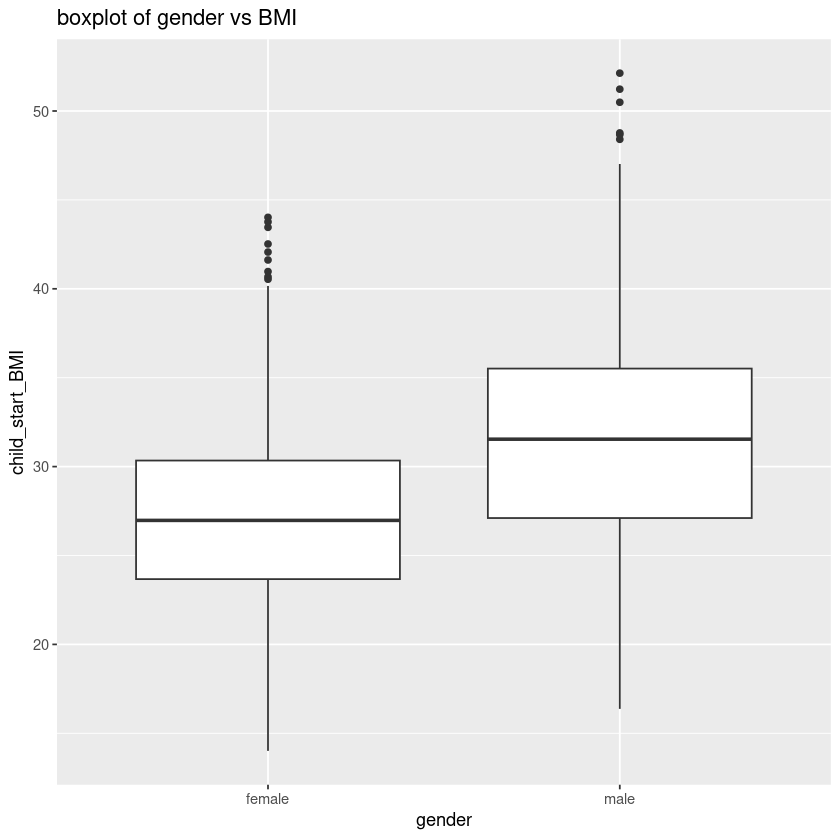

In [13]:
gender_bmi <- my_bmi %>%
  ggplot(aes(x = gender, y = child_start_BMI)) + geom_boxplot() + 
  labs(title = "boxplot of gender vs BMI", x = "gender", y = "child_start_BMI")
gender_bmi

_By looking at this graph, I found that the median BMI for men is higher than women's and that men have a higher IQR overall than women. This shows that men have a higher average BMI than women. After this I am going to create a boxplot with gender against children_end_BMI. Then I will compare the two plots to try and find out how these measures affect males and females differently._

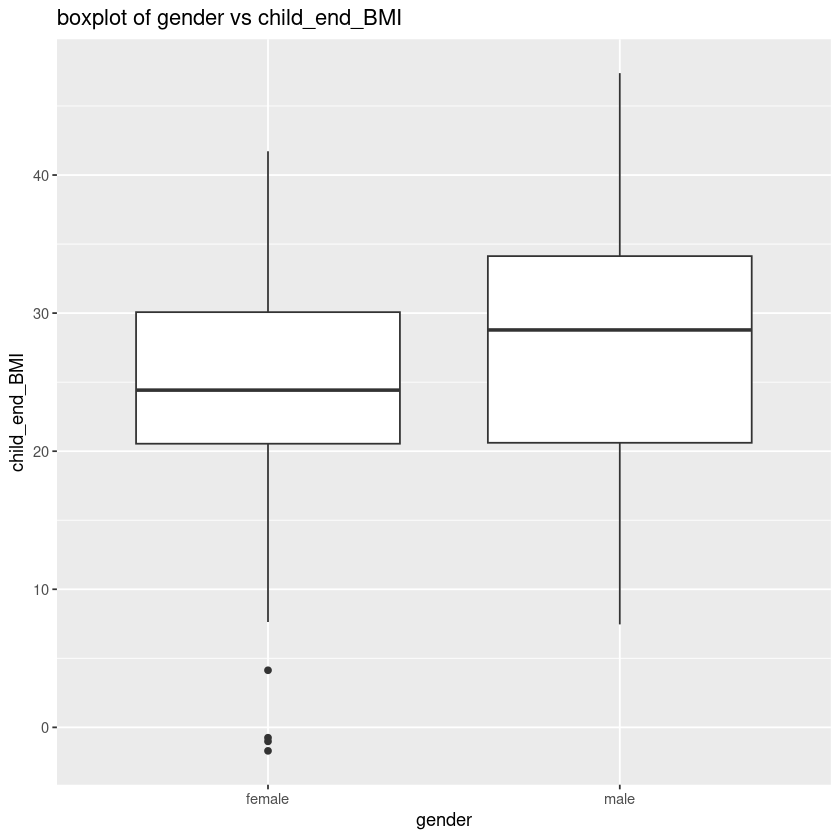

In [19]:
#Then do the boxplot using gender to against the BMI of children after the treatment. Discover more about the relationship between gender and BMI by comparing two graph.
egender_bmi <- my_bmi %>%
  group_by(social_class) %>%
  ggplot(aes(x = gender, y = child_end_BMI)) + geom_boxplot() +
  labs(title = "boxplot of gender vs child_end_BMI", x = "gender", y = "child_end_BMI")
egender_bmi

_The graph shows that median BMI for male is higher than females and and have a higher range, which is the same situation to the graph up on. Since I can say there is strong evidence to prove that BMI of male is usually higher than females. In addition, I also find out that the median and Q3 of BMI of male has decreaded significantly, but BMI for female does not change much. That may because the average weight and height of male are usually higher than female and male. Beside, men tend to have more lean muscle mass compared to women.Muscle burns more calories than fat, so individuals with more muscle tend to burn more calories, even at rest. After that I will like to find out more evidence to support the assumption, I'm using the gender to against the BMI of children that have decreased after the treatment to create a boxplot._

$titile
[1] "gender vs child_BMI_decreased"

$x
[1] "gender"

$y
[1] "child_BMI_decreased"

attr(,"class")
[1] "labels"

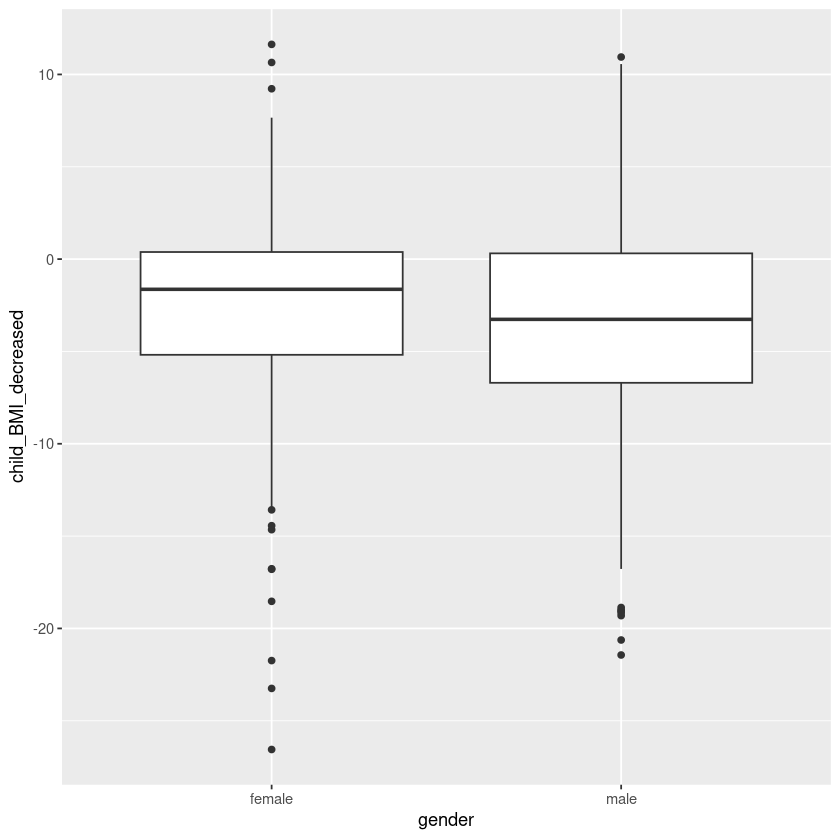

In [21]:
my_bmi %>%
  ggplot(aes(gender, child_BMI_decreased)) + geom_boxplot()
  labs(titile = "gender vs child_BMI_decreased", x = "gender", y = "child_BMI_decreased")

_In this graph, I can see that men's BMI drops faster than women's. The median BMI decreased for men is lower than for women, and overall the IQR for men's BMI is lower than women's this means that men's BMI decreased faster than women's._

_I have use enough with the string variables compare with BMI. For the next step I want to use the numeric variables to against BMI and see if there are others variable that can affect BMI. The first one is the BMI of dad before the treatment._

$x
[1] "dad_bmi"

$y
[1] "first_bmi"

$title
[1] "dad_bmi vs first_bmi"

attr(,"class")
[1] "labels"

`geom_smooth()` using formula = 'y ~ x'


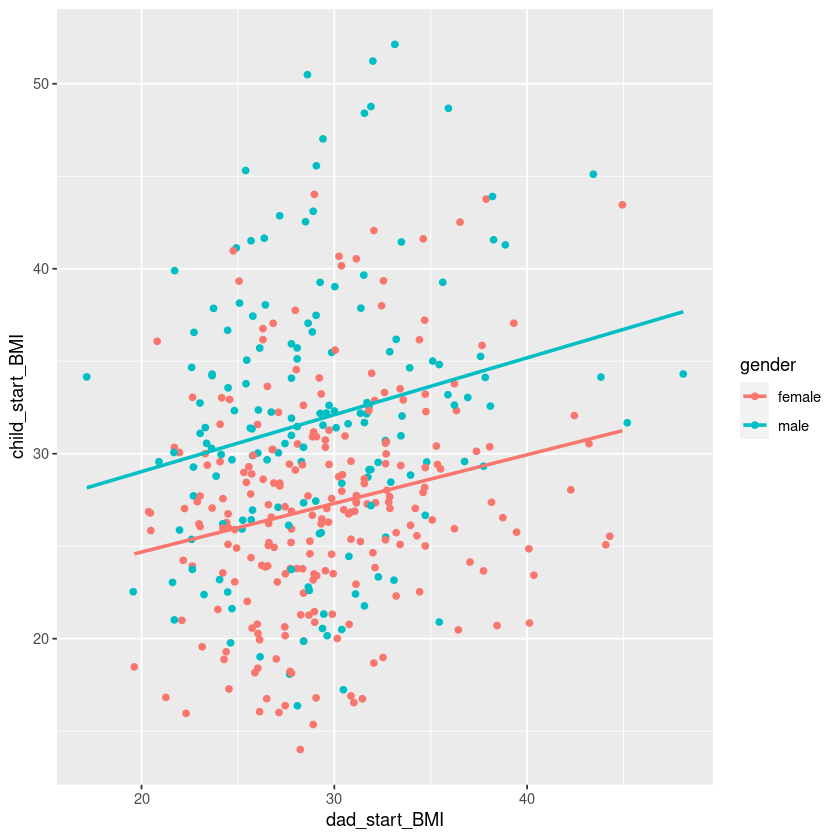

In [22]:
#Next step I try to find out more variable that can related to BMI. Then I first try dad's bmi before the treatment.
sdad_skid <- my_bmi %>%
  group_by(social_class) %>%
    ggplot(aes(x = dad_start_BMI, y = child_start_BMI, col = gender)) + geom_point() + geom_smooth(method = lm, se = FALSE)
    labs(title = "dad_bmi vs first_bmi", x = "dad_bmi", y = "first_bmi")
sdad_skid

#To make the relationship more obvious, I applied linear regression to this scatter plot. 
#In addition, I used gender to differentiate between them in order to see if different genders and fathers had different influences on them.

_After I apply the linear reggression funcion and use `col` to be gender, I can better observe how a fathers BMI behaves with children of different genders. Firstly, there are two positive linear regression lines in the graph, which father influence the BMI on both genders since two line seems to be parallel. Therefore, the father's BMI rises then his children's BMI rises for both males and females. Then next step, I would like use BMI of mothers before the treatment to against BMI of children using the same method. As the correlation of mothers is lower than fathers, I assume mothers will have less influence than fathers._

`geom_smooth()` using formula = 'y ~ x'


$x
[1] "mom_bmi"

$y
[1] "first_bmi"

$title
[1] "mom_bmi vs kid_bmi"

attr(,"class")
[1] "labels"

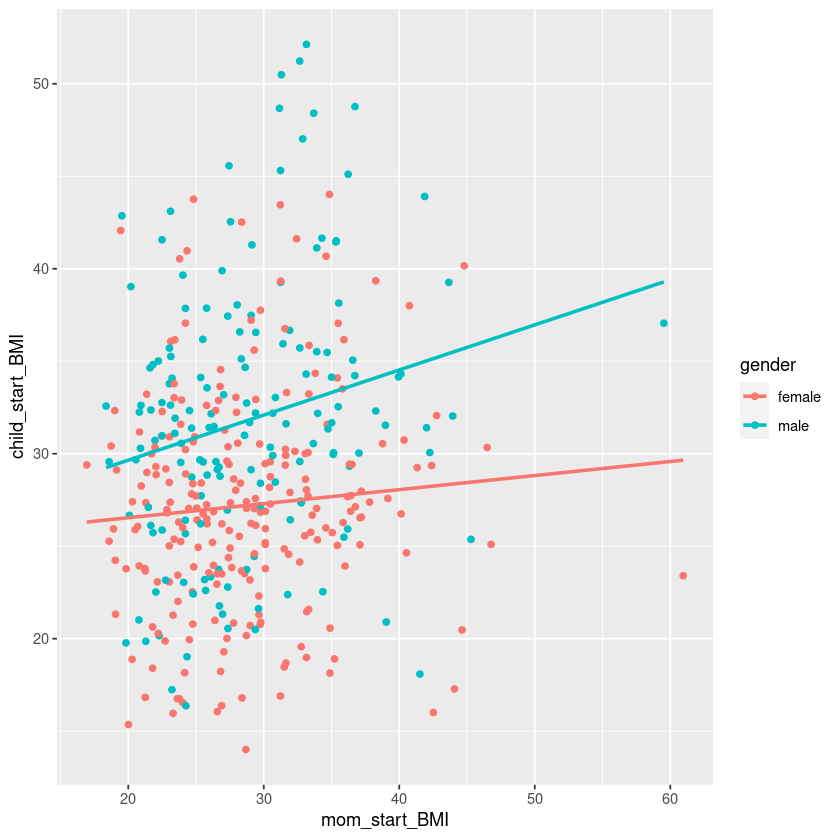

In [23]:
#Next check out if mother will have same situation as father.
my_bmi %>%
  group_by(social_class) %>%
  ggplot(aes(x = mom_start_BMI, y = child_start_BMI, col = gender)) + geom_point() + geom_smooth(method = lm, se = FALSE)
  labs(title = "mom_bmi vs kid_bmi", x = "mom_bmi", y = "first_bmi")

_In this graph I observe that the line for females is much flatter than that for males, which suggests that mothers have less influence than fathers on those children being female._

## Summary

_In conclusion, I can tell that BMI does influence by gender and their parent.For those who want to drop their BMI to become healthier, it may be more effective to have their parents try to lower their BMI at the same time. In addition, it will be much easier to drop the bmi for male than female. This also explain that the average BMI of male is 26.6 and female is 29.6._